# **Data Visualisation**
- explore data, detect patterns and report interesting insights.
- library - matplotlib

## matplotlib library

In [40]:
help("matplotlib")

Help on package matplotlib:

NAME
    matplotlib - This is an object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the object-oriented library is
    encouraged when programming; pyplot is primarily for working
    interactively.  The
    exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
    :func:`~matplotlib.pyplot.subplot`,
    :func:`~matplotlib.pyplot.subplots`, and
    :func:`~pyplot.savefig`, which can greatly simplify scripting.
    
    Modules include:
    
        :mod:`matplotlib.axes`
            defines the :class:`~matplotlib.axes.Axes` class.  Most pylab

- help("matplotlib.pyplot") 
- to check the functions under pyplot, i didnt output it because too longggg

***

### Line Chart

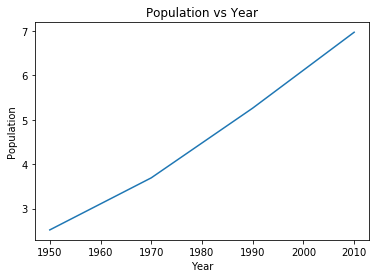

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]

plt.plot(year, pop)

# Add title
plt.title('Population vs Year')

# Add x axis label
plt.xlabel('Year')

# Add y axis label
plt.ylabel('Population')

plt.show()

***

### Scatter Plot

In [5]:
import pandas as pd

data = pd.ExcelFile('data/population_literacy.xlsx')
population_literacy = data.parse('Sheet1')

population_literacy.rename(columns={'Country ': 'Country', 'Continent  ': 'Continent', 'female literacy': 'Female Literacy',
                    'fertility': 'Fertility', 'population': 'Population'}, inplace=True)

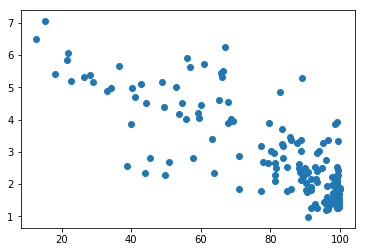

In [6]:
plt.scatter(population_literacy['Female Literacy'], population_literacy['Fertility'])
plt.show()

***

### Histogram

(array([145.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.03566000e+05, 3.33706600e+08, 6.67309635e+08, 1.00091267e+09,
        1.33451570e+09, 1.66811874e+09, 2.00172177e+09, 2.33532481e+09,
        2.66892784e+09, 3.00253088e+09, 3.33613391e+09]),
 <a list of 10 Patch objects>)

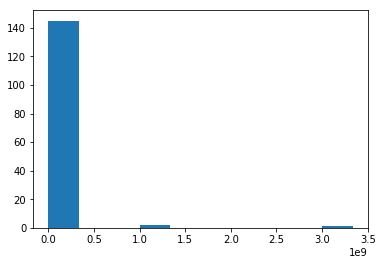

In [10]:
plt.hist(population_literacy['Population'])

(array([ 3.,  6.,  4.,  7.,  9.,  8., 11., 11., 28., 76.]),
 array([ 12.6 ,  21.34,  30.08,  38.82,  47.56,  56.3 ,  65.04,  73.78,
         82.52,  91.26, 100.  ]),
 <a list of 10 Patch objects>)

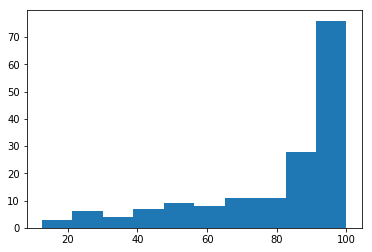

In [9]:
plt.hist(population_literacy['Female Literacy'])

(array([160.,   2.,   0.,   0.,   1.]),
 array([1.03566000e+05, 6.67309635e+08, 1.33451570e+09, 2.00172177e+09,
        2.66892784e+09, 3.33613391e+09]),
 <a list of 5 Patch objects>)

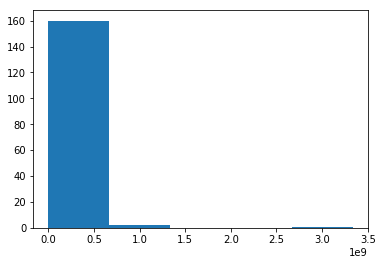

In [11]:
# Fill missing values in Population column with the median value.
population_literacy['Population'] = population_literacy['Population'].fillna(population_literacy['Population'].median())

plt.hist(population_literacy['Population'], bins=5)

***

### Bubble Chart

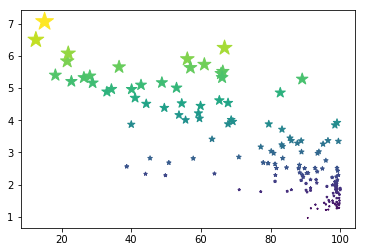

In [12]:
plt.scatter(population_literacy['Female Literacy'], population_literacy['Fertility'], s=population_literacy['Fertility'] ** 3, marker='*',
           c=population_literacy['Fertility'])

plt.show()

***

### Emulating ggplot

- ggplot is a famous plotting package for R
- we can emulate ggplot by setting the style sheet in matplotlib
- set plt.style.use('ggplot')

In [13]:
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to

In [14]:
plt?

Type:        module
String form: <module 'matplotlib.pyplot' from 'C:\\Users\\neohf\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>
File:        c:\users\neohf\anaconda3\lib\site-packages\matplotlib\pyplot.py
Docstring:  
`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
a MATLAB-like way of plotting.

pyplot is mainly intended for interactive plots and simple cases of programmatic
plot generation::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

The object-oriented API is recommended for more complex plots.


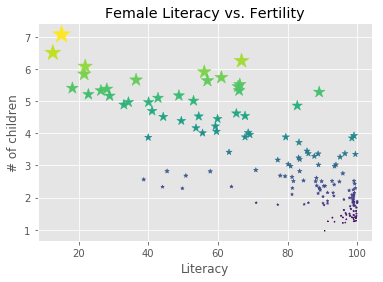

In [15]:
# Emulate ggplot
plt.style.use('ggplot')

#Create bubble chart
plt.scatter(population_literacy['Female Literacy'], population_literacy['Fertility'], s=population_literacy['Fertility'] ** 3, marker='*',
           c=population_literacy['Fertility'])
plt.scatter


# Add title
plt.title('Female Literacy vs. Fertility')

# Add x axis label
plt.xlabel('Literacy')

# Add y axis label
plt.ylabel('# of children')

plt.show()

***

### Multiple Subplots

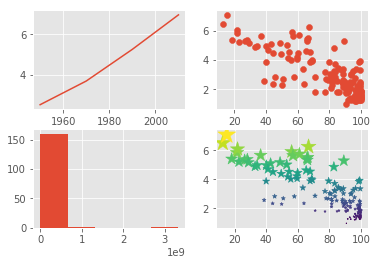

In [16]:
# Create figure and array ax containing the subplots
fig, ax = plt.subplots(nrows=2, ncols=2)

# Access the first subplot: upper left
plt.subplot(2,2,1)
plt.plot(year, pop)

# Access the second subplot: upper right
plt.subplot(2,2,2)
plt.scatter(population_literacy['Female Literacy'], population_literacy['Fertility'])

# Access the third subplot: lower left
plt.subplot(2,2,3)
plt.hist(population_literacy['Population'], bins=5)

# Access the fourth subplot: lower right
plt.subplot(2,2,4)
plt.scatter(population_literacy['Female Literacy'], population_literacy['Fertility'], s=population_literacy['Fertility'] ** 3, marker='*',
           c=population_literacy['Fertility'])


# Exporting plots
plt.savefig('subplot1.svg')
plt.savefig('subplot1.png')
plt.savefig('subplot1_high resolution.jpg', dpi=1000)
plt.savefig('subplot2.jpg', dpi=100)

***

### Exporting Plots

In [ ]:
# Exporting plots
plt.savefig('subplot1.svg')
plt.savefig('subplot1.png')
plt.savefig('subplot1_high resolution.jpg', dpi=1000)
plt.savefig('subplot2.jpg', dpi=100)